In [1]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from linear_classifier_gaussian_data import *
from scipy.stats import norm

In [3]:
c = cp.Variable(2)
d = cp.Variable(1)

In [4]:
objective = cp.Maximize(c.T @ mus[0] + d)
constraints = [
    c.T @ mus[1] + d + norm.ppf(1-eta) * cp.quad_form(c, Sigmas[1]) <= 0,
    c.T @ mus[2] + d + norm.ppf(1-eta) * cp.quad_form(c, Sigmas[2]) <= 0,
    c.T @ mus[3] + d + norm.ppf(1-eta) * cp.quad_form(c, Sigmas[3]) <= 0,
    c.T @ mus[4] + d + norm.ppf(1-eta) * cp.quad_form(c, Sigmas[4]) <= 0
]

In [5]:
problem = cp.Problem(objective, constraints)
result = problem.solve()

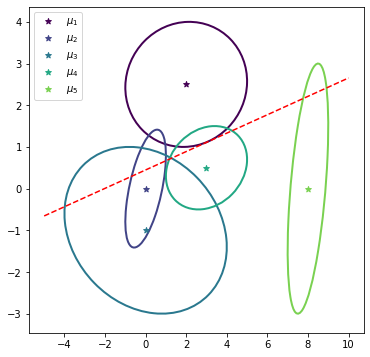

In [6]:
plot_helper(c.value, d.value)